# Question: What insights we can gain from gross amount?


Have gross box-office trends changed over time. What is the current gross box-office revenue that Microsoft Movie Studio should plan meet and _beat_?

---

# Data Understanding


I used data from [Box Office Mojo](https://www.boxofficemojo.com/), an online box office reporting and analysis service, to investigate this question. 

* bom.movie_gross.csv.gz
    * Contains title, studio, release year, domestic, and foreign gross.


In [11]:
import pandas as pd
import numpy as np

# set up pandas to display floats in a more human friendly way
pd.options.display.float_format = '{:,.2f}'.format

In [12]:
bom_movie_gross_df = pd.read_csv('../zippedData/bom.movie_gross.csv.gz')
bom_movie_gross_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,"415,000,000.00",652000000,2010
1,Alice in Wonderland (2010),BV,"334,200,000.00",691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,"296,000,000.00",664300000,2010
3,Inception,WB,"292,600,000.00",535700000,2010
4,Shrek Forever After,P/DW,"238,700,000.00",513900000,2010


In [13]:
print(bom_movie_gross_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB
None


# Data Preparation

__Data cleaning and conversion details:__

* No duplicates.

* title had no NAs.

* studio 5 had NaNs. Replace them with "UNKNOWN" for unknown

* domestic_gross has NaNs. 3359 populated out of 3387. Will select a subset to use

* foreign_gross is str and needs to be converted to float

* foreign_gross has NaNs.  2037 populated out of 3387.  Will select a subset to use

* year has no NaNs

* Creating a worldwide_gross column where there are values for both domestic_gross and foreign_gross. This is the measure I'm interested in. 

In [14]:
# check for duplicates
bom_dups = bom_movie_gross_df[bom_movie_gross_df.duplicated()]
print(len(bom_dups))

0


In [15]:
# fill NaNs
bom_movie_gross_df['studio'].fillna('UNKNOWN', inplace=True)

In [16]:
# convert to float
bom_movie_gross_df['foreign_gross'] = bom_movie_gross_df['foreign_gross'].str.replace(',', '').astype(float)

In [17]:
print(bom_movie_gross_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3387 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB
None


Creating a new dataframe that __only__ includes movies with values for both domestic and foreign gross so we can calculate worldwide gross.  

Results in 2009 movies released during 2010-2018.

In [18]:
bom_ww_gross_df = bom_movie_gross_df.loc[bom_movie_gross_df['domestic_gross'].notnull() & bom_movie_gross_df['foreign_gross'].notnull()]
bom_ww_gross_df['worldwide_gross'] = bom_ww_gross_df['domestic_gross'] + bom_ww_gross_df['foreign_gross']

/home/user/anaconda3/envs/flatiron/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


The min for domestic_gross and foreign_gross are very small but I'm leaving them in as (1) they may be valid values (really poor performace or release date at the very end of 2018). 

The max for domestic_gross and foreign_gross are very large but to be expected as valid movie blockbuster amounts. This does make me want to look the data distribution to inform if I should use average or meadian gross amounts for the trend analysis.

In [273]:
print(bom_ww_gross_df.describe())

       domestic_gross  foreign_gross     year  worldwide_gross
count        2,009.00       2,009.00 2,009.00         2,009.00
mean    46,973,114.38  75,718,219.20 2,013.50   122,691,333.58
std     81,599,661.11 138,129,649.08     2.60   207,487,031.92
min            400.00         600.00 2,010.00         4,900.00
25%        665,000.00   3,900,000.00 2,011.00     8,141,000.00
50%     16,500,000.00  19,300,000.00 2,013.00    42,300,000.00
75%     56,000,000.00  75,900,000.00 2,016.00   133,700,000.00
max    936,700,000.00 960,500,000.00 2,018.00 1,518,900,000.00


In [20]:
print(bom_ww_gross_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 3353
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            2009 non-null   object 
 1   studio           2009 non-null   object 
 2   domestic_gross   2009 non-null   float64
 3   foreign_gross    2009 non-null   float64
 4   year             2009 non-null   int64  
 5   worldwide_gross  2009 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 109.9+ KB
None


In [21]:
bom_ww_gross_df['year'].unique()

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018])

In [3]:
### SAVE IT
#bom_ww_gross_df.to_csv('./cleanedData/bom.worldwide_gross.csv')

# Exploratory Data Analysis


The Box Office Mojo dataset has box office gross data from the years 2010 through 2018. Let's look at how these  values have changed over the 9 year span. 

It's now time to check out the data distributions to see if I should examine __both__ _average_ gross and _median_ gross values.

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:xlabel='domestic_gross'>

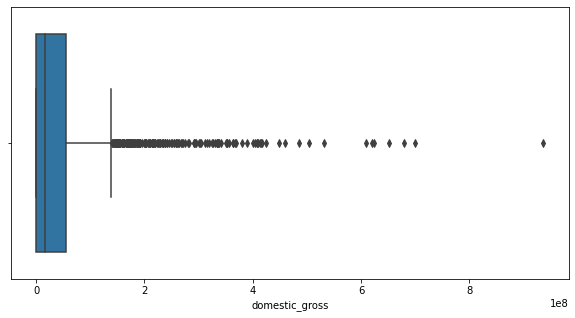

In [23]:
plt.figure(figsize = (10,5))
sns.boxplot(data = bom_ww_gross_df, x = 'domestic_gross') 

<AxesSubplot:xlabel='foreign_gross'>

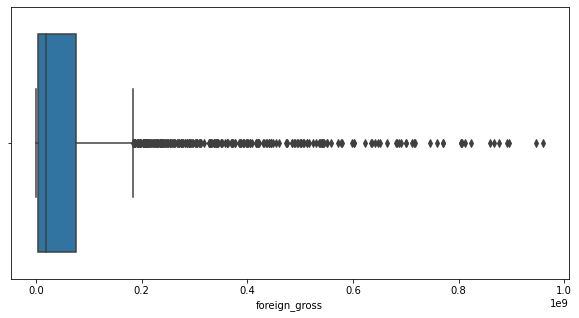

In [25]:
plt.figure(figsize = (10,5))
sns.boxplot(data = bom_ww_gross_df, x = 'foreign_gross')

<AxesSubplot:xlabel='worldwide_gross'>

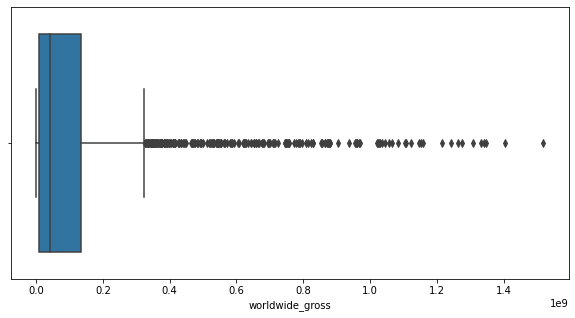

In [26]:
plt.figure(figsize = (10,5))
sns.boxplot(data = bom_ww_gross_df, x = 'worldwide_gross')

Look at those outliers (blockbusters) towards the right!  I'll examine __both__ _average_ gross and _median_ gross values in the trend analysis.

/home/user/anaconda3/envs/flatiron/lib/python3.6/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


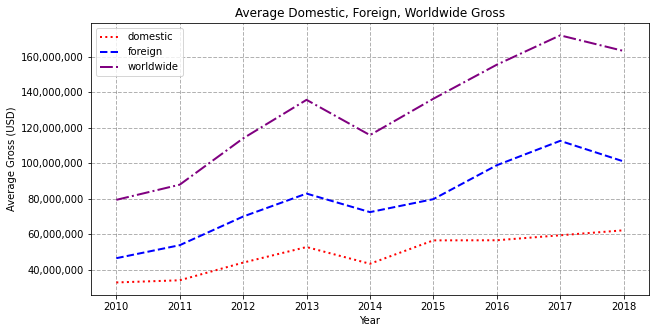

In [53]:
from matplotlib.ticker import StrMethodFormatter

dgross_avg = bom_ww_gross_df.groupby(['year'])['domestic_gross'].mean()
fgross_avg = bom_ww_gross_df.groupby(['year'])['foreign_gross'].mean()
wwgross_avg = bom_ww_gross_df.groupby(['year'])['worldwide_gross'].mean()

plt.figure(figsize=(10, 5))
plt.plot(dgross_avg.index, dgross_avg, color='red', linewidth=2.0, linestyle=':')
plt.plot(fgross_avg.index, fgross_avg, color='blue', linewidth=2.0, linestyle='--')
plt.plot(wwgross_avg.index, wwgross_avg, color='purple', linewidth=2.0, linestyle='-.')
plt.grid(color = 'black', alpha = 0.3, linestyle = '--', linewidth = 1)
plt.axes().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

plt.title('Average Domestic, Foreign, Worldwide Gross')
plt.xlabel('Year')
plt.ylabel('Average Gross (USD)')
plt.legend(['domestic','foreign', 'worldwide'], loc=2)
plt.show()

/home/user/anaconda3/envs/flatiron/lib/python3.6/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


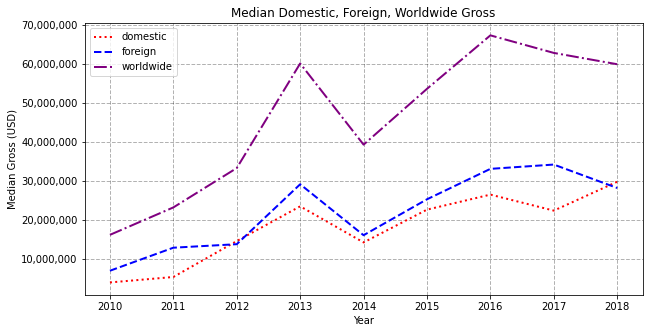

In [54]:
from matplotlib.ticker import StrMethodFormatter

dgross_median = bom_ww_gross_df.groupby(['year'])['domestic_gross'].median()
fgross_median = bom_ww_gross_df.groupby(['year'])['foreign_gross'].median()
wwgross_median = bom_ww_gross_df.groupby(['year'])['worldwide_gross'].median()

plt.figure(figsize=(10, 5))
plt.plot(dgross_median.index, dgross_median, color='red', linewidth=2.0, linestyle=':')
plt.plot(fgross_median.index, fgross_median, color='blue', linewidth=2.0, linestyle='--')
plt.plot(wwgross_median.index, wwgross_median, color='purple', linewidth=2.0, linestyle='-.')
plt.grid(color = 'black', alpha = 0.3, linestyle = '--', linewidth = 1)
plt.axes().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.title('Median Domestic, Foreign, Worldwide Gross')
plt.xlabel('Year')
plt.ylabel('Median Gross (USD)')
plt.legend(['domestic','foreign', 'worldwide'], loc=2)
plt.show()

### Trends

We can tell there is a general upwards trend in all gross values over the 9 year span. There is a dip in 2014 but all 3 gross averages and medians resume their rise. A decline appears in foreign (and worldwide) gross from 2017 to 2018 but domestic gross increased.

Now that we see the overall trend (up!), let's focus on the __average__ and __median__ box office gross values for _recent_ movies (i.e., movies released in the last 5 years).  This should give the client some target numbers they will need to meet (or beat!) in order to be major players in the movie industry. 

In [33]:
# get the average gross for recent movies (released in the last 5 years of this dataset's timeframe)
bom_ww_gross_recent_df = bom_ww_gross_df.loc[bom_ww_gross_df['year'].isin([2018, 2017, 2016, 2015, 2014])]

print(bom_ww_gross_recent_df.describe())

       domestic_gross  foreign_gross     year  worldwide_gross
count          966.00         966.00   966.00           966.00
mean    54,910,633.84  91,610,597.30 2,015.86   146,521,231.14
std     93,517,688.85 150,879,414.48     1.43   226,302,484.92
min            700.00       1,010.00 2,014.00        38,300.00
25%      2,000,000.00   6,325,000.00 2,015.00    14,812,575.00
50%     21,900,000.00  26,550,000.00 2,016.00    54,900,000.00
75%     61,250,000.00 101,025,000.00 2,017.00   167,225,000.00
max    936,700,000.00 946,400,000.00 2,018.00 1,405,400,000.00


/home/user/anaconda3/envs/flatiron/lib/python3.6/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


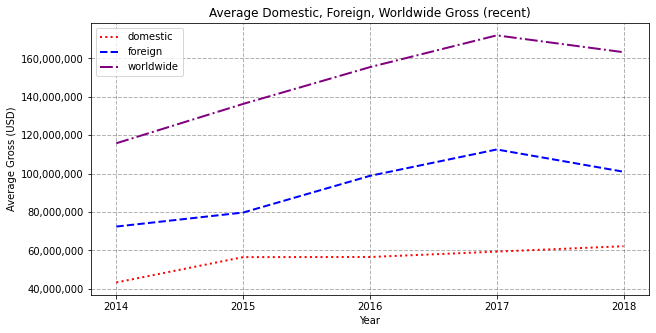

In [50]:
from matplotlib.ticker import StrMethodFormatter

dgross_recent_avg = bom_ww_gross_recent_df.groupby(['year'])['domestic_gross'].mean()
fgross_recent_avg = bom_ww_gross_recent_df.groupby(['year'])['foreign_gross'].mean()
wwgross_recent_avg = bom_ww_gross_recent_df.groupby(['year'])['worldwide_gross'].mean()

plt.figure(figsize=(10, 5))
plt.plot(dgross_recent_avg.index, dgross_recent_avg, color='red', linewidth=2.0, linestyle=':')
plt.plot(fgross_recent_avg.index, fgross_recent_avg, color='blue', linewidth=2.0, linestyle='--')
plt.plot(wwgross_recent_avg.index, wwgross_recent_avg, color='purple', linewidth=2.0, linestyle='-.')
plt.grid(color = 'black', alpha = 0.3, linestyle = '--', linewidth = 1)
plt.xticks(wwgross_recent_avg.index)
plt.axes().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.title('Average Domestic, Foreign, Worldwide Gross (recent)')
plt.xlabel('Year')
plt.ylabel('Average Gross (USD)')
plt.legend(['domestic','foreign', 'worldwide'], loc=2)
plt.show()

/home/user/anaconda3/envs/flatiron/lib/python3.6/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


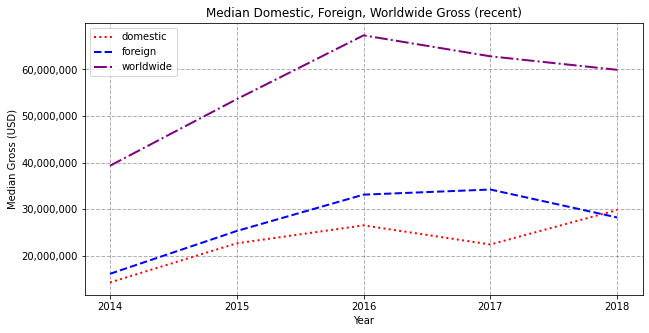

In [49]:
from matplotlib.ticker import StrMethodFormatter

dgross_recent_median = bom_ww_gross_recent_df.groupby(['year'])['domestic_gross'].median()
fgross_recent_median = bom_ww_gross_recent_df.groupby(['year'])['foreign_gross'].median()
wwgross_recent_median = bom_ww_gross_recent_df.groupby(['year'])['worldwide_gross'].median()

plt.figure(figsize=(10, 5))
plt.plot(dgross_recent_median.index, dgross_recent_median, color='red', linewidth=2.0, linestyle=':')
plt.plot(fgross_recent_median.index, fgross_recent_median, color='blue', linewidth=2.0, linestyle='--')
plt.plot(wwgross_recent_median.index, wwgross_recent_median, color='purple', linewidth=2.0, linestyle='-.')
plt.grid(color = 'black', alpha = 0.3, linestyle = '--', linewidth = 1)
plt.xticks(wwgross_recent_avg.index)
plt.axes().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.title('Median Domestic, Foreign, Worldwide Gross (recent)')
plt.xlabel('Year')
plt.ylabel('Median Gross (USD)')
plt.legend(['domestic','foreign', 'worldwide'], loc=2)
plt.show()

###  Recent Trends

These plots are mainly provided for clarity in honing in on recent gross amounts that the client should use as targets to be competitive. Note the __big__ difference in average and median amounts. Printing out the recent world wide gross amounts below. (This is the purple dot dash line in the plots.)

In [39]:
print(wwgross_recent_avg)

year
2014   115,831,843.15
2015   136,311,712.15
2016   155,474,388.01
2017   172,009,606.81
2018   163,230,345.48
Name: worldwide_gross, dtype: float64


In [40]:
print(wwgross_recent_median)

year
2014   39,300,000.00
2015   53,600,000.00
2016   67,300,000.00
2017   62,800,000.00
2018   59,900,000.00
Name: worldwide_gross, dtype: float64


# Conclusions


* __Movie gross amounts are on an upwards trend.__ For the past nine years, domestic, foreign, (and worldwide) movie gross amounts are rising. Movies are still in demand which is good news for our client's new endevour.
* __Recent movie gross amounts dipped but recovered.__ More good news but also a slight warning to expect that yearly increases are a sure thing.
* __Set target gross goals wisely.__ If the client want to swing for the fences and release the next blockbuster, they should target the recent average gross amounts. If they want to start sensible and strong, they should target the recent median gross amounts.

# Next Steps/Future Work

* __Procure more data from BOM with both domestic and foreign gross.__ The final dataset I end up with is small (2009 movies and 966 recent movies). I would like to follow the same steps but on a larger dataset from Box Office Mojo that contains more densely populated domestic and foreign gross values.